In [1]:
import scanpy as sc

In [2]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [3]:
adata1

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
adata1.obs["Last_cell_type"].unique()

['CXCR5- Naïve B', 'Late_ERY', 'Mid_ERY', 'Treg', 'CXCR5+ Naïve B', ..., 'DP(Q) T', 'Cycling Treg', 'DP(P) T', 'Macrophages', 'Small pre-B']
Length: 39
Categories (39, object): ['CD14+PPBP+ Monocytes', 'CD56highCD16low NK', 'CX3CR1+ NK', 'CXCR5+ Naïve B', ..., 'Th17like_INNATE_T', 'Treg', 'abT(entry)', 'pDC']

In [43]:
subNK3=adata1[adata1.obs["Last_cell_type"].str.contains(' NK') ]

In [23]:
# subNK3=subNK3[~subNK3.obs.New_Body.isin(['Thymus'])]

In [44]:
subNK3.obs["New_Body"]=subNK3.obs.New_Body.astype('str')

/tmp/ipykernel_99677/3890580975.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subNK3.obs["New_Body"]=subNK3.obs.New_Body.astype('str')


In [54]:
subNK3.uns['log1p']['base']=None

In [11]:
# sc.tl.rank_genes_groups(subNK3, "New_Body", groups=['Liver'], reference='PBMC', method='wilcoxon')
# sc.pl.rank_genes_groups(subNK3, groups=['Liver'], n_genes=20)

In [46]:
subNK3.obs['New_Body'] = subNK3.obs['New_Body'].astype('category')

In [53]:
sc.tl.rank_genes_groups(subNK3, groupby='Last_cell_type', method='wilcoxon')

In [49]:
subNK3.layers['scaled'] = sc.pp.scale(subNK3, copy=True).X

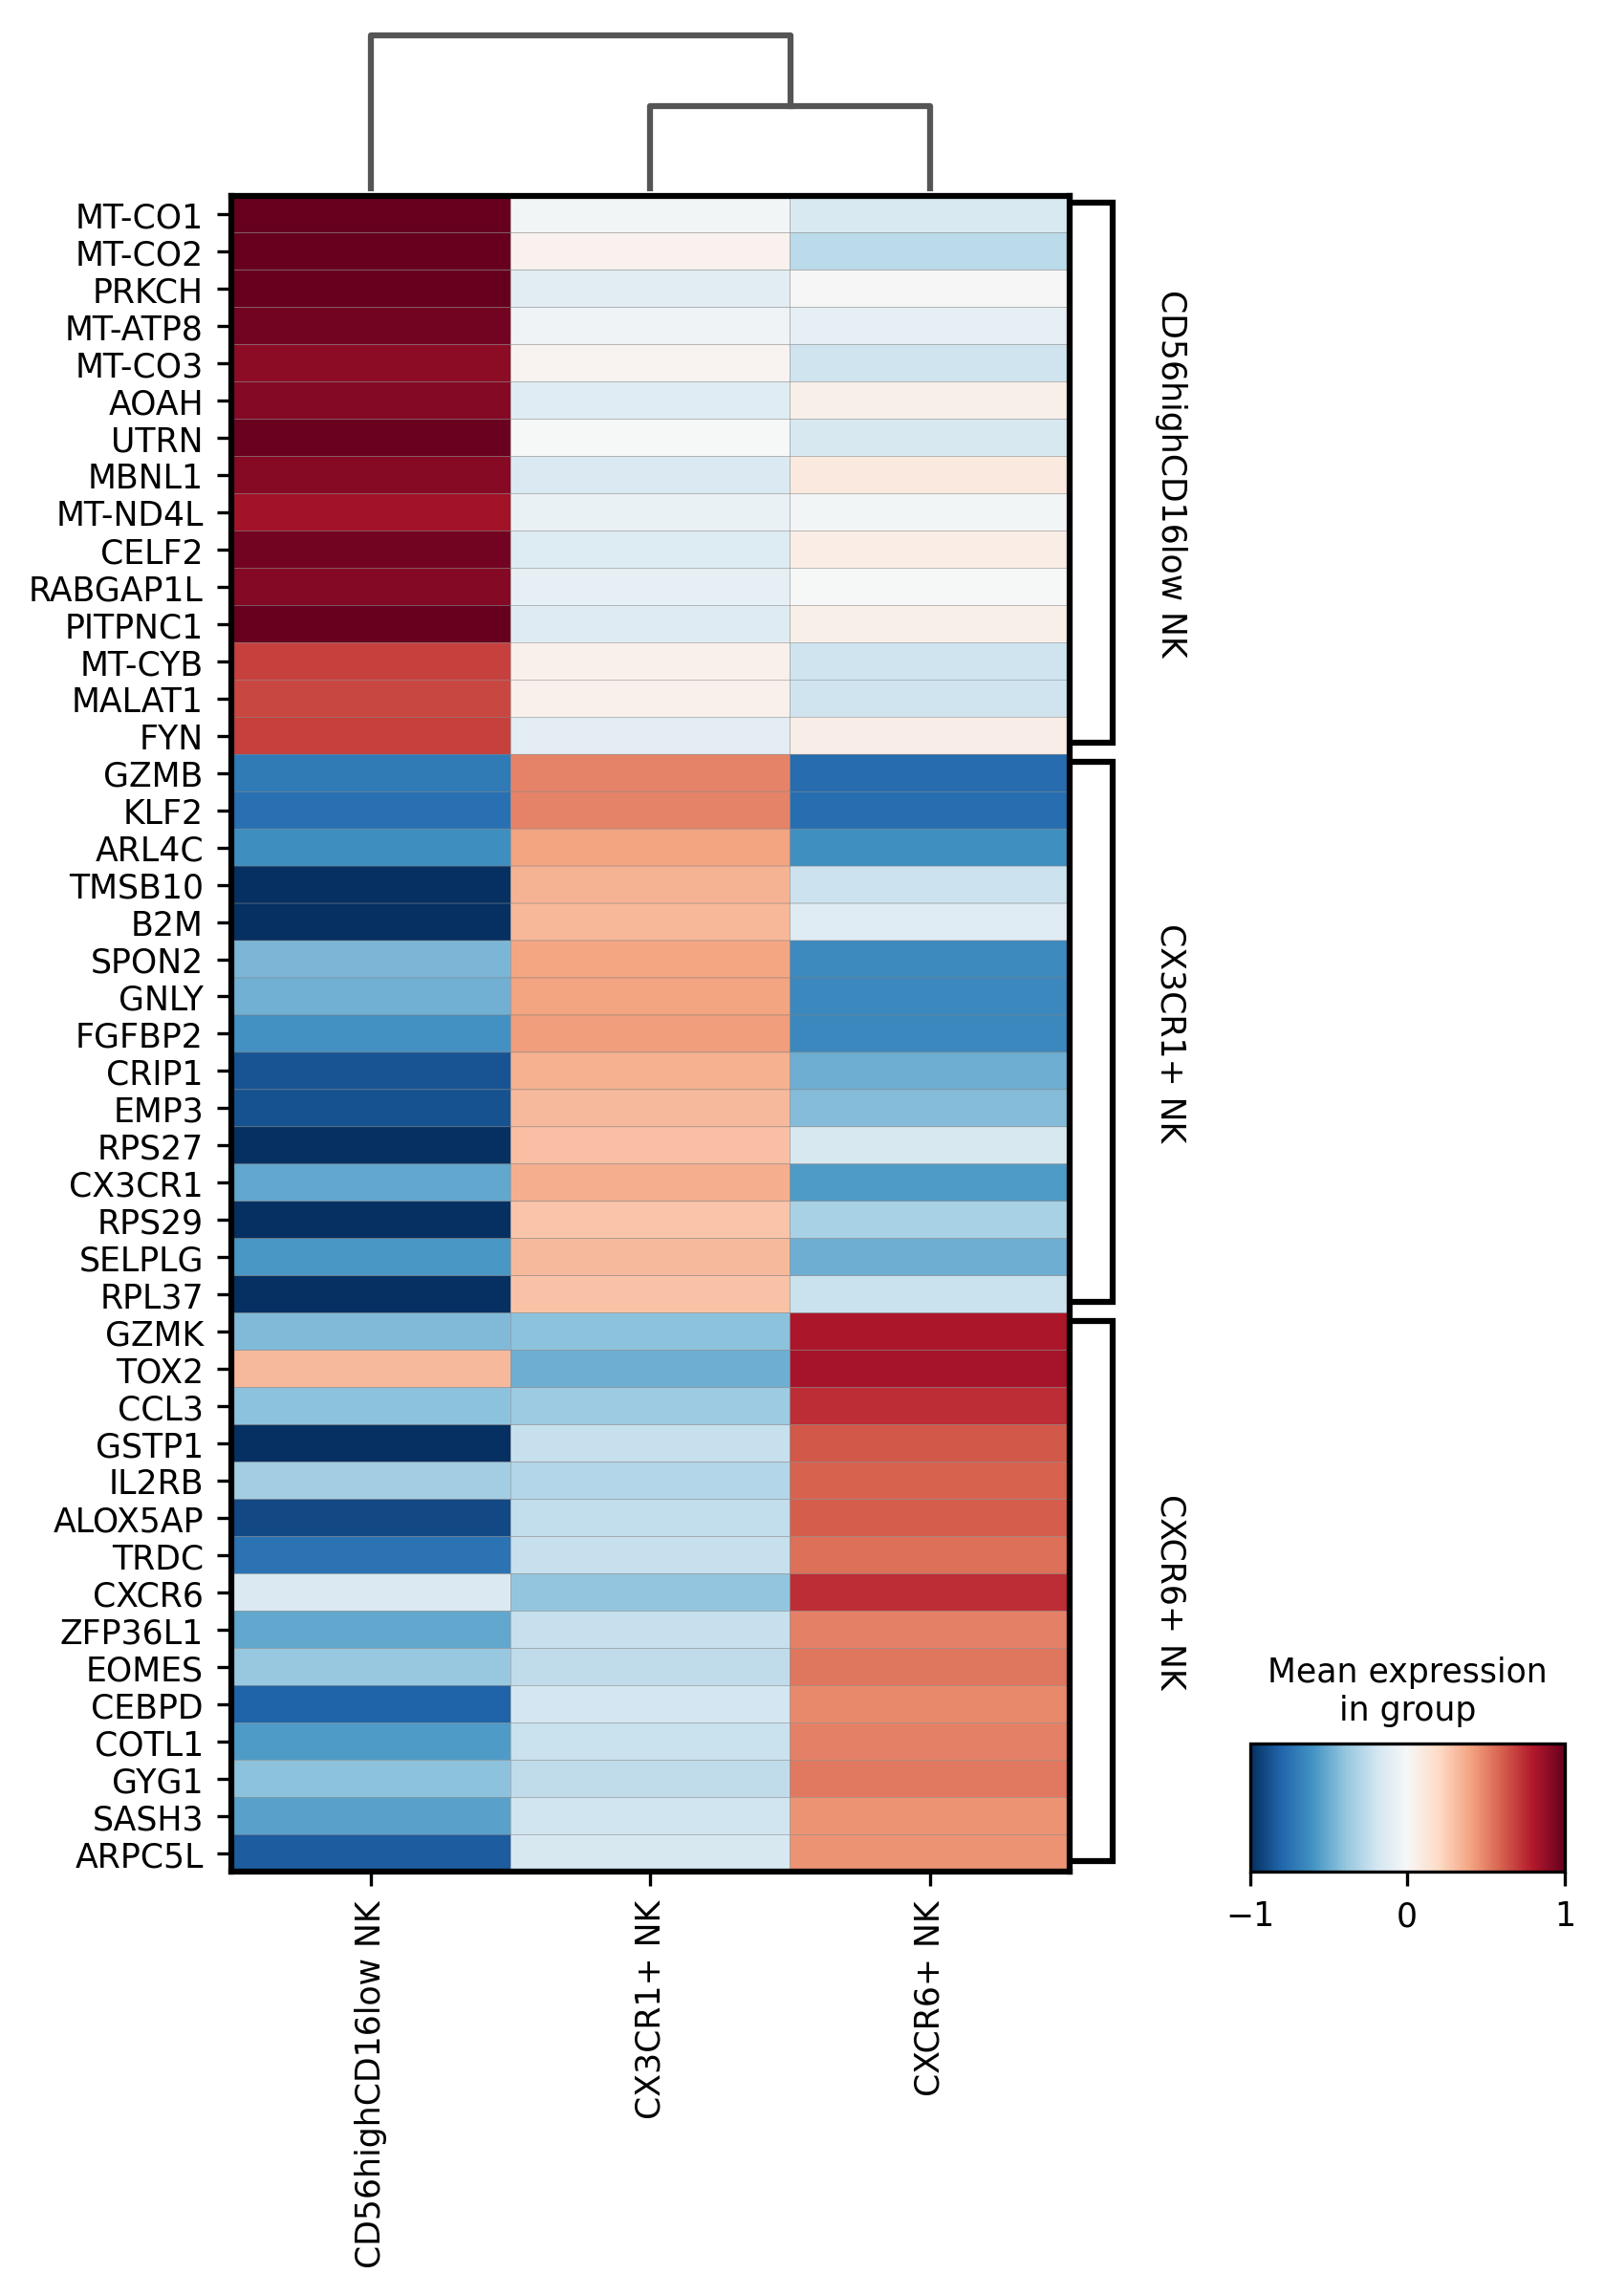

In [75]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = [3, 2]
plt.rcParams['figure.dpi'] = 300
sc.pl.rank_genes_groups_matrixplot(subNK3, n_genes=15, use_raw=False, vmin=-1, vmax=1, cmap='RdBu_r', layer='scaled',swap_axes=True,show=False, figsize=(6,8))
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure3/S13/S13.pdf",bbox_inches='tight')

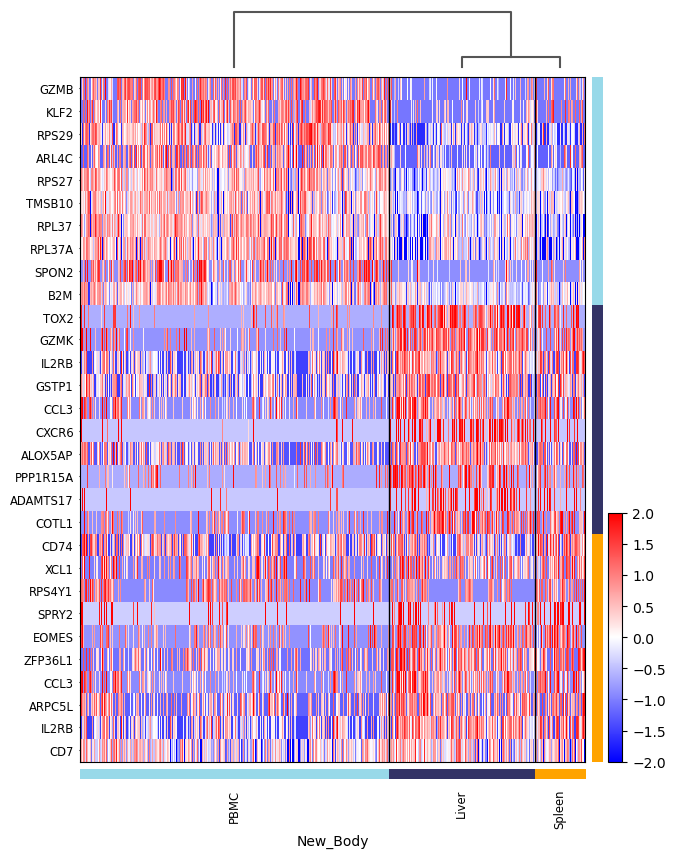

In [36]:
# sc.pl.rank_genes_groups_stacked_violin(subNK3, n_genes=30, cmap='viridis_r', swap_axes=True,)
sc.pl.rank_genes_groups_heatmap(subNK3,show_gene_labels=True,n_genes=10, use_raw=False, swap_axes=True,  cmap='bwr',vmin=-2, vmax=2,  layer='scaled', figsize=(7,10), show=False);

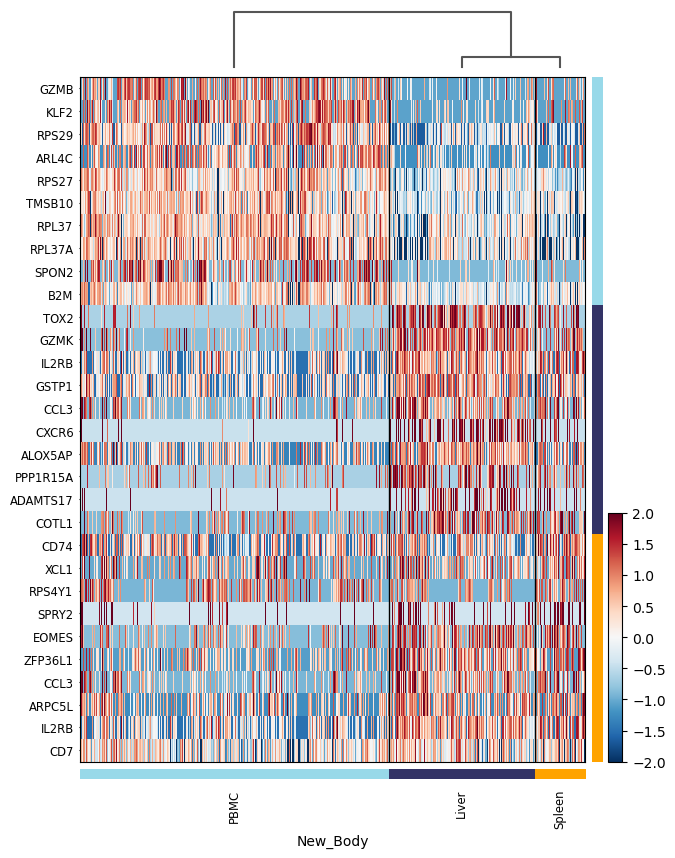

In [29]:
sc.pl.rank_genes_groups_heatmap(subNK3,show_gene_labels=True,n_genes=10, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,10), show=False);

In [ ]:
# sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr', layer='scaled')

In [ ]:
# subNK3.layers['scaled'] = sc.pp.scale(subNK3, copy=True).X

In [ ]:
# sc.tl.dendrogram(subNK3, groupby='New_Body')

In [ ]:
# sc.pl.rank_genes_groups_heatmap(subNK3,show_gene_labels=True,n_genes=10, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,10), show=False);

In [60]:
df3 = sc.get.rank_genes_groups_df(subNK3, group=None)

print(df3[1:20])

                 group     names     scores  logfoldchanges          pvals  \
1   CD56highCD16low NK    MT-CO2  39.823914        1.348752   0.000000e+00   
2   CD56highCD16low NK     PRKCH  39.157707        2.016804   0.000000e+00   
3   CD56highCD16low NK   MT-ATP8  37.560135        1.535526  9.625652e-309   
4   CD56highCD16low NK    MT-CO3  35.187267        1.372968  3.131183e-271   
5   CD56highCD16low NK      AOAH  34.196148        1.585580  2.758526e-256   
6   CD56highCD16low NK      UTRN  33.396942        1.849311  1.518543e-244   
7   CD56highCD16low NK     MBNL1  33.048828        1.590644  1.617022e-239   
8   CD56highCD16low NK   MT-ND4L  32.973427        1.351925  1.953137e-238   
9   CD56highCD16low NK     CELF2  30.840677        1.852178  7.470312e-209   
10  CD56highCD16low NK  RABGAP1L  28.950478        1.776226  2.767726e-184   
11  CD56highCD16low NK   PITPNC1  28.609385        2.036135  5.135130e-180   
12  CD56highCD16low NK    MT-CYB  28.226883        1.146843  2.7

In [ ]:
# subNK3.obs.New_Body.value_counts()

In [ ]:
# subNK2=adata1[adata1.obs["Last_cell_type"].isin( ['CD16highGNLY+ NK', 'CD16lowGNLY- NK','CD56highCD16low NK'])]

In [ ]:
# subNK=adata1[adata1.obs["Last_cell_type"].isin( ['CD16highGNLY+ NK', 'CD16lowGNLY- NK'])]

In [ ]:
# subNK.uns['log1p']['base']=None
# subNK2.uns['log1p']['base']=None


In [ ]:
# sc.tl.rank_genes_groups(subNK, "Last_cell_type", groups=['CD16highGNLY+ NK'], reference='CD16lowGNLY- NK', method='wilcoxon')
# sc.pl.rank_genes_groups(subNK, groups=['CD16highGNLY+ NK'], n_genes=20)

In [ ]:
# sc.pl.rank_genes_groups_violin(subNK, groups='CD16highGNLY+ NK', n_genes=20)

In [ ]:
# sc.pl.dotplot(subNK, ["GZMB","KLF2","ARL4C","GNLY"], groupby='Last_cell_type');

In [ ]:
# subadjNK = df_sorted[(df_sorted['pvalue_adj'] < 0.05)& (df_sorted['logFC'].abs()> 2) & (df_sorted['score'].abs()> 2)]

# print(subadjNK)

In [ ]:
# subadjNK

In [ ]:
%load_ext rpy2.ipython

In [ ]:
# %%R -i  subadjNK
# subadjNKup=subset(subadjNK,logFC>0)

In [ ]:
# df_sorted

In [ ]:
# %%R -i df_sorted
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df2 <- bitr(df_sorted$gene, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# merged_df2 <- merge(df_sorted, map_df2, by.x = "gene", by.y = "SYMBOL")


# FCgenelist <- merged_df2$logFC
# names(FCgenelist) <- merged_df2$ENTREZID
# FCgenelist <- sort(FCgenelist, decreasing = TRUE)

# HsC5_msigdbr <- msigdbr(species = "Homo sapiens", category = "C5")  
# HsC5_df <- as.data.frame(HsC5_msigdbr[,c('gs_name','entrez_gene','gene_symbol')])

# HsC7_msigdbr <- msigdbr(species = "Homo sapiens", category = "C7") 
# HsC7_df <- as.data.frame(HsC7_msigdbr[,c('gs_name','entrez_gene','gene_symbol')])


# HsC5_msig <- GSEA(FCgenelist,TERM2GENE=HsC5_df[,c(1,2)])

# HsC7_msig <- GSEA(FCgenelist,TERM2GENE=HsC7_df[,c(1,2)])
# head(HsC5_msig,20) 


In [ ]:
# %%R
# head(HsC7_msig,20) 

In [ ]:
# %%R -w 1600 -h 1000 -r 200
# dotplot(HsC5_msig, showCategory = 20,font.size = 8)

In [ ]:
# %%R
# GSEA

In [ ]:
# %%R -w 3000 -h 2000 -r 200
# library(enrichplot)
# p1 <- gseaplot2(HsC5_msig ,1:3,base_size = 20,subplots = 1:2)
# p1



In [ ]:
# %%R -i subadjNK
# subadjNKup=subset(subadjNK,logFC>0)
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df <- bitr(subadjNKup$gene, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# merged_df <- merge(subadjNKup, map_df, by.x = "gene", by.y = "SYMBOL")
# head(merged_df)
# dim(merged_df)
# enrichKKup <- enrichKEGG(gene =merged_df$ENTREZID, organism = "hsa", 
#                        keyType = "kegg",
#                        pvalueCutoff = 0.05,
#                        pAdjustMethod = "BH",
#                        minGSSize = 10, maxGSSize = 500, 
#                        qvalueCutoff = 0.05,
#                        use_internal_data = FALSE)

# erichDEgo_up<-enrichGO(merged_df$gene, OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, 
#                     qvalueCutoff = 0.05,keyType = 'SYMBOL')

In [ ]:
# %%R
# subadjNKup %>% head(20)

In [ ]:
# %%R
# intersect(subadjNKDown$gene,subadjNKup$gene)

In [ ]:
# %%R -w 1600 -h 2000 -r 200

# library(ggplot2)
# library(tidyverse)
# erichDEgo_up %>% arrange(desc(Count)) %>%barplot(.,  x = "Count", #or "GeneRatio"
#   color = "p.adjust", #or "p.adjust","qvalue","pvalue"
#   showCategory = 25,#显示前top20
#   font.size = 8,
#   title = "UP All",
#   label_format = 50 ,
                                                 
# )+scale_fill_gradientn(
#   colours=c("#F6313E","#f6c619","#00AF99","#0eb0c8"),
#   values = NULL,
#   space = "Lab",
#   na.value = "grey50",
#   guide = "colourbar",
#   aesthetics = "fill"
# )+theme_classic()

In [ ]:
# %%R -i subadjNK
# subadjNKDown=subset(subadjNK,logFC<0)
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df <- bitr(subadjNKDown$gene, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# merged_df <- merge(subadjNKDown, map_df, by.x = "gene", by.y = "SYMBOL")
# head(merged_df)
# dim(merged_df)
# enrichKKDown <- enrichKEGG(gene =merged_df$ENTREZID, organism = "hsa", 
#                        keyType = "kegg",
#                        pvalueCutoff = 0.05,
#                        pAdjustMethod = "BH",
#                        minGSSize = 10, maxGSSize = 500, 
#                        qvalueCutoff = 0.05,
#                        use_internal_data = FALSE)

# erichDEgo_Down<-enrichGO(merged_df$gene, OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, 
#                     qvalueCutoff = 0.05,keyType = 'SYMBOL')

In [ ]:
# %%R -w 1600 -h 2000 -r 200
# erichDEgo_Down_Dataframe=head(erichDEgo_Down,500)
# erichDEgo_up_Dataframe=head(erichDEgo_up,500)

In [ ]:
# %%R
# setdiff(erichDEgo_Down_Dataframe$Description,erichDEgo_up_Dataframe$Description)

In [ ]:
# %%R
# head()
# setdiff(erichDEgo_up_Dataframe$Description,erichDEgo_Down_Dataframe$Description)

In [ ]:
# mkdir -p /home/maolp/Allcount/All_scanpyData/NKenrich

In [ ]:
# import os
# os.chdir('/home/maolp/Allcount/All_scanpyData/')

In [ ]:
# %%R
# write.csv(erichDEgo_up,'/home/maolp/Allcount/All_scanpyData/NKenrich/NKerichDEgo_up.csv')
# write.csv(erichDEgo_Down,'/home/maolp/Allcount/All_scanpyData/NKenrich/NKerichDEgo_Down.csv')

In [ ]:
# %%R -w 1600 -h 2000 -r 200

# library(ggplot2)
# library(tidyverse)
# erichDEgo_Down %>% arrange(desc(Count)) %>%barplot(.,  x = "Count", #or "GeneRatio"
#   color = "p.adjust", #or "p.adjust","qvalue","pvalue"
#   showCategory = 25,
#   font.size = 8,
#   title = "Down All",
#   label_format = 50 ,
                                                 
# )+scale_fill_gradientn(
#   colours=c("#F6313E","#f6c619","#00AF99","#0eb0c8"),
#   values = NULL,
#   space = "Lab",
#   na.value = "grey50",
#   guide = "colourbar",
#   aesthetics = "fill"
# )+theme_classic()

In [ ]:
# selectEnrich=pd.read_csv('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/NKenrich/Select.csv')

# selectEnrich['geneID'] =selectEnrich['geneID'].str.split('/')


# selectEnrich = selectEnrich.explode('geneID')
# # BselectEnrich

In [ ]:
# selectEnrich

In [ ]:
# ax = sc.pl.heatmap(subNK, subadjNK["gene"], groupby='Last_cell_type', cmap='viridis', dendrogram=True,)

In [ ]:
# subNK.layers['scaled'] = sc.pp.scale(subNK, copy=True).X

In [ ]:
# ax = sc.pl.heatmap(subNK, subadjNK["gene"], groupby='Last_cell_type',  layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

In [ ]:
# subadjNK[1:20]["gene"].values

In [ ]:
# import numpy as np

# genes = np.concatenate([subadjNK[0:50]["gene"].values, subadjNK[182:232]["gene"].values])

# genes_list = genes.tolist()

# print(genes_list)

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 8]
# plt.rcParams['figure.dpi'] = 300
# ax = sc.pl.heatmap(subNK, ["CD160","GZMK","TIGIT","TIGIT"], groupby='Last_cell_type', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(8,12))

In [ ]:
# subNK2.layers['scaled'] = sc.pp.scale(subNK2, copy=True).X

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 300
# sc.pl.umap(subNK2,color=["GZMK","GZMB","CX3CR1","CXCR6","CD69"])

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 300
# sc.pl.umap(subNK2,color=["New_Body"])

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 300
# sc.pl.umap(subNK2,color=["Last_cell_type"])

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 300
# sc.pl.umap(subNK2,color=["Last_cell_type"])

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 300
# sc.pl.dotplot(subNK2,["GZMK","GZMB","CXCR6"],groupby=["Last_cell_type"],standard_scale="var")

In [ ]:
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 300
# sc.pl.dotplot(subNK2,["GZMK","GZMB","CX3CR1","GNLY","XCL1","CD226","NCR3","FCGR3A","KLRD1","AREG"],groupby=["Last_cell_type"])

In [ ]:
# sc.tl.rank_genes_groups(subNK2, groupby='Last_cell_type', method='wilcoxon')

In [ ]:
# df = sc.get.rank_genes_groups_df(subNK2, group=None)

# print(df)

In [ ]:
# df.group.unique()

In [ ]:
# df.group.unique()
# GZMK=df[df.group=="CD16lowGNLY- NK"]
# subadjGZMK = GZMK[(GZMK['pvals_adj'] < 0.05)& (GZMK['logfoldchanges']> 1) & (GZMK['scores'].abs()> 10)]

# print(subadjGZMK)

In [ ]:
# %%R -i subadjGZMK
# subadjNKup=subset(subadjNK,logFC>0)
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df <- bitr(subadjGZMK$names, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# subadjGZMK_merged_df <- merge(subadjGZMK, map_df, by.x = "names", by.y = "SYMBOL")
# head(merged_df)
# dim(merged_df)
# subadjGZMK_enrichKKup <- enrichKEGG(gene =subadjGZMK_merged_df$ENTREZID, organism = "hsa", 
#                        keyType = "kegg",
#                        pvalueCutoff = 0.05,
#                        pAdjustMethod = "BH",
#                        minGSSize = 10, maxGSSize = 500, 
#                        qvalueCutoff = 0.05,
#                        use_internal_data = FALSE)

# subadjGZMK_erichDEgo_up<-enrichGO(subadjGZMK_merged_df$names, OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, 
#                     qvalueCutoff = 0.05,keyType = 'SYMBOL')

In [ ]:
# %%R
# write.csv(subadjGZMK_erichDEgo_up,"/home/maolp/Allcount/All_scanpyData/NKenrich/subadjGZMK_erichDEgo_up.csv")

In [ ]:
# df.group.unique()
# GZMB=df[df.group=="CD16highGNLY+ NK"]
# subadjGZMB = GZMB[(GZMB['pvals_adj'] < 0.05)& (GZMB['logfoldchanges']> 1) & (GZMB['scores'].abs()> 10)]

# print(subadjGZMB)

In [ ]:
# %%R -i subadjGZMB
# subadjNKup=subset(subadjNK,logFC>0)
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df <- bitr(subadjGZMB$names, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# subadjGZMB_merged_df <- merge(subadjGZMB, map_df, by.x = "names", by.y = "SYMBOL")
# head(merged_df)
# dim(merged_df)
# subadjGZMB_enrichKKup <- enrichKEGG(gene =subadjGZMB_merged_df$ENTREZID, organism = "hsa", 
#                        keyType = "kegg",
#                        pvalueCutoff = 0.05,
#                        pAdjustMethod = "BH",
#                        minGSSize = 10, maxGSSize = 500, 
#                        qvalueCutoff = 0.05,
#                        use_internal_data = FALSE)

# subadjGZMB_erichDEgo_up<-enrichGO(subadjGZMB_merged_df$names, OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, 
#                     qvalueCutoff = 0.05,keyType = 'SYMBOL')

In [ ]:
# %%R
# write.csv(subadjGZMB_erichDEgo_up,"/home/maolp/Allcount/All_scanpyData/NKenrich/subadjGZMB_erichDEgo_up.csv")

In [ ]:
# %%R -i subadjCD56highCD16lowNK
# subadjNKup=subset(subadjNK,logFC>0)
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df <- bitr(subadjCD56highCD16lowNK$names, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# subadjCD56highCD16low_merged_df <- merge(subadjCD56highCD16lowNK, map_df, by.x = "names", by.y = "SYMBOL")
# head(merged_df)
# dim(merged_df)
# subadjCD56highCD16low_enrichKKup <- enrichKEGG(gene =subadjCD56highCD16low_merged_df$ENTREZID, organism = "hsa", 
#                        keyType = "kegg",
#                        pvalueCutoff = 0.05,
#                        pAdjustMethod = "BH",
#                        minGSSize = 10, maxGSSize = 500, 
#                        qvalueCutoff = 0.05,
#                        use_internal_data = FALSE)

# subadjCD56highCD16low_erichDEgo_up<-enrichGO(subadjCD56highCD16low_merged_df$names, OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, 
#                     qvalueCutoff = 0.05,keyType = 'SYMBOL')

In [ ]:
# %%R
# write.csv(subadjCD56highCD16low_erichDEgo_up,"/home/maolp/Allcount/All_scanpyData/NKenrich/subadjCD56highCD16low_erichDEgo_up.csv")

In [ ]:
# %%R -w 3000 -h 3000 -r 300
# # subadjCD56highCD16low_merged_df
# dotplot(subadjCD56highCD16low_erichDEgo_up)